# Smart Lead Scoring Engine

__Goal:__ 

To predict the propensity to buy a product based on the user's past activities and user level information.
Predicting 0 or 1 indicating if the user will buy the product in next 3 months or not

## 1. Setup Environment

The goal of this section is to:
- Import all the packages
- Set the options for data visualizations

In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# to do math
import math  

#Handling Class Imbalance
from   imblearn.over_sampling import RandomOverSampler

# to build the models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# to evaluate the models
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

# Time
import time
import datetime

import warnings
# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

## 2. Data Overview

Purpose is to:

1. Load the datasets 
2. Explore the features

The data is broken into two files train set and test set

Load the train and test data using pd.read_csv()

In [2]:
%%time
# Load Data
df_train   = pd.read_csv('train.csv') #train dataset
test_sub = pd.read_csv('test.csv') #test data set for submission

Wall time: 75 ms


In [3]:
# rows and columns of the train data

print("\n\033[1mShape of Train Dataframe \n\033[0m")
print(": Rows- {}, Columns- {}".format(df_train.shape[0], df_train.shape[1]))

# visualise the train dataset
print("\n\033[1m Head of Train Data\033[0m")
display(df_train.head())

print("\n\033[1m Tail of Train Data\033[0m")
display(df_train.tail())

print("\n\033[1mShape of Test Dataframe \n\033[0m")
print(": Rows- {}, Columns- {}".format(test_sub.shape[0], test_sub.shape[1]))

# visualise the test dataset
print("\n\033[1m Head of Train Data\033[0m")
display(test_sub.head())

print("\n\033[1m Tail of Train Data\033[0m")
display(test_sub.tail())


Shape of Train Dataframe 

: Rows- 39161, Columns- 19

 Head of Train Data


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0



 Tail of Train Data


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0



Shape of Test Dataframe 

: Rows- 13184, Columns- 18

 Head of Train Data


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0



 Tail of Train Data


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0
13183,52345,2022-03-30,13,13,NaN,NaN,0,0,0,0,0,1,1,1,0,0,1,0


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'>Observation:</h4>
</div>

- Train data set contains 39161 rows and 19 variables i.e feature
- Test data set contain 13184 rows and 18 columns i.e feature
- means train data has 18 feature and one target, here "buy" has the target variable

###### Data Description
- __id__: Unique identifier of a lead
- __created_at__: Date of lead dropped
- __signup_date__: Sign up date of the user on the website
- __campaign_var (1 and 2)__: Campaign information of the lead
- __products_purchased__: No. of past products purchased at the time of dropping the lead
- __user_activity_var (1 to 12)__: Derived activities of the user on the website
- __buy__: 0 or 1 indicating if the user will buy the product in next 3 months or not (__Target Variable__)

###### Let's check Memory occupied by the dataframe (in mb)

In [4]:
#memory occupied by train dataframe
df_train.memory_usage(deep=True).sum() / 1024**2  

9.579318046569824

In [5]:
#memory occupied by test dataframe
test_sub.memory_usage(deep=True).sum() / 1024**2  

3.0723772048950195

Both dataframe take less memorey and no need to take any action for memory optimizaion 

## 3. Basic Data Stats

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Get the dimensions of data
- Get the summary of data
- Get various statistics of data

#### Shape of dataframe

In [6]:
# Dimensions of train dataset
print(df_train.shape)

(39161, 19)


The dataset has 39161 rows and 19 columns

In [7]:
#lets check the the data type used for each columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

* created_at and signup_date is the date field, let's convert it to datetime

In [8]:
#apply to traing set
df_train[["created_at", "signup_date"]] = df_train[["created_at", "signup_date"]].apply(pd.to_datetime)

#apply to submissin set
test_sub[["created_at", "signup_date"]] = test_sub[["created_at", "signup_date"]].apply(pd.to_datetime)

#### Summary of dataframe (5 number summary of dataframe)

In [9]:
#using pandas_summary finding the insight of whole data frame in oneshot
from pandas_summary import DataFrameSummary
df_summary = DataFrameSummary(df_train)
df_summary.summary()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.0,NaN,39161.0,39161.0,18250.0,NaN,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0,39161.0
mean,19581.0,NaN,6.523812,6.452746,2.154137,NaN,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.01144,0.000383,0.218942,0.000562,0.05102
std,11304.951283,NaN,3.472944,2.614296,0.779815,NaN,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9791.0,NaN,4.0,5.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19581.0,NaN,6.0,6.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,29371.0,NaN,9.0,8.0,3.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,39161.0,NaN,16.0,15.0,4.0,NaN,3.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0
counts,39161,39161,39161,39161,18250,24048,39161,39161,39161,39161,39161,39161,39161,39161,39161,39161,39161,39161,39161
uniques,39161,365,16,15,4,1800,4,2,2,2,3,4,3,3,2,2,5,2,2


In [10]:
# sns.pairplot(df_train, hue='buy')

__Check class imbalance__

In [11]:
df_train.loc[:, 'buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

**Lot of interesting things can be observed here:**
- column products_purchased and signup_date found missing values of 53.4% and 38.59% respectively 
- campaign_var (1 and 2) has numeric values and found 15 to 16 unique values in range of(1 to 16)
- products_purchased has also numeric values and have 4 unique values
- user_activity_var (1 to 12) - has some numeric values and some boolean values
- Target class is imbalanced.will do the necessary action if need

## 4. Data Preprocessing for EDA

The goal of this section is to:

- Identifying missing values in data
- Replacing missing values in data
- Removing missing values from data
- Handling Skewed data
- Outliers detection and removal
- Finding and fixing Imbalance class
- Encoding Categorical Data

__Let's Check the variable types__

In [12]:
cat_vars = [var for var in df_train.columns if df_train[var].dtype == 'O']
len(cat_vars)

0

Not found any categorical variables

In [13]:
# now let's identify the numerical variables

num_vars = [
    var for var in df_train.columns if var not in cat_vars and var not in ['buy','created_at','signup_date']
]
print("Number of Numerical Variable :",len(num_vars))

print("\nNumerical Variable:\n",num_vars)

Number of Numerical Variable : 16

Numerical Variable:
 ['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12']


__Missing values__

In [14]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df_train[vars_with_na].isnull().mean().sort_values(ascending=False)

products_purchased    0.533975
signup_date           0.385920
dtype: float64

Its observerd that products_purchased and signup_date has the null values or missing values, same is observered in the data summary

In [15]:
#Let's check the unique values
df_train['products_purchased'].unique()

array([ 2.,  3., nan,  1.,  4.])

#### Checking Relationship between missing data on products_purchased and buy 

In [16]:
df_missing = df_train.copy()
var = 'products_purchased'
df_missing = df_missing.loc[df_missing['products_purchased'].isnull()]
df_missing[var] = np.where(df_missing[var].isnull(), 1, 0)
df_missing.groupby('buy')['products_purchased'].count()

buy
0    19866
1     1045
Name: products_purchased, dtype: int64

* Its shows that missing values in products_purchased 5% has one value and 95% has 0 values
* droping nan values

In [17]:
#in submissin file we are replacing with 0
df_train['products_purchased'] = df_train['products_purchased'].astype(str).str.replace("nan","0")
df_train['products_purchased']= df_train['products_purchased'].astype('float')

In [18]:
df_train = df_train.dropna()

In [19]:
#in submissin file we are replacing with 0
test_sub['products_purchased'] = test_sub['products_purchased'].astype(str).str.replace("nan","0")
test_sub['products_purchased']= test_sub['products_purchased'].astype('float')

__Numerical variables__
* Let's go ahead and find out what numerical variables we have in the dataset

In [20]:
len(num_vars)

16

In [21]:
df_train[num_vars].head(2)

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0


__Temporal variables__

We have two date variable 'signup_date' and 'created_at' let's create some temoral variable and do some reserch to check the behaviour of customer

In [22]:
# let's explore the values of these date variables
date_var = ['signup_date','created_at']

__Create Date Feature__

In [23]:
#for signup_date
df_train['month_sign']    = df_train['created_at'].dt.dayofweek
df_train['weekdays_sign']    = df_train['created_at'].dt.dayofweek
df_train['days_sign']        = df_train['created_at'].dt.day

#for created_at
df_train['month_create']    = df_train['created_at'].dt.dayofweek
df_train['weekdays_create']    = df_train['created_at'].dt.dayofweek
df_train['days_create']        = df_train['created_at'].dt.day

Let's explore the evolution of this variabel on buy 

In [24]:
temp_var=['month_sign','weekdays_sign','days_sign','month_create','weekdays_create','days_create']

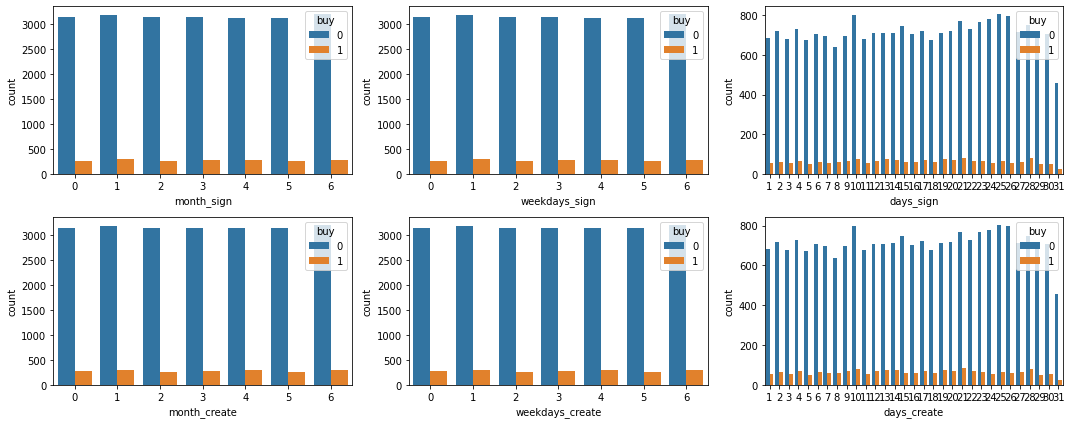

In [25]:
n=3
plt.figure(figsize=[15,3*math.ceil(len(temp_var)/n)])

for i in range(len(temp_var)):
    plt.subplot(math.ceil(len(temp_var)/n),n,i+1)
    sns.countplot(x=df_train[temp_var[i]],data = df_train,hue=df_train['buy']) 
plt.tight_layout()
plt.show()

Observation clearly shows that days 5 to 25, customer buy the product, means month end and start the response is very slow

## 5. Exploratory Data Analysis

Exploratory data analysis investigate data sets to find out patterns and see if any of the variables can be useful to explain / predict the target variables. 

The goal of this section is to:
- Check if the target variable is balanced or is there a need to balance the target variable
- Get insights or relationships from the data which would be useful from business perspective.

### Check distribution of target variable

In [26]:
df_train.loc[:, 'buy'].value_counts()

0    22075
1     1973
Name: buy, dtype: int64

In [27]:
#visualise target distribution
def visualise_target(data, target):
    MAP={}
    labels =[0,1]
    for e, i in enumerate(sorted(data[target].unique())):
        MAP[i]=labels[e]    
    df1 = data.copy()
    df1[target]=df1[target].map(MAP)
    explode=np.zeros(len(labels))
    explode[-1]=0.1
    print('\033[1mTarget Variable Distribution')
    plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=False, 
    explode=explode, autopct='%1.2f%%', radius=1, startangle=-30)
    plt.show()

Target Variable Distribution


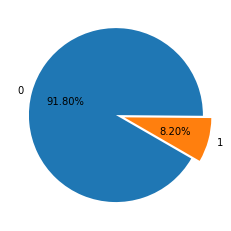

In [28]:
#Lets visualise the class
visualise_target(df_train, 'buy')

Let's check the distribution of target class using a bar plot and check the proportion of products_purchased by customer

__products_purchased__: let's check the distribution with respect to target

<AxesSubplot:xlabel='products_purchased', ylabel='count'>

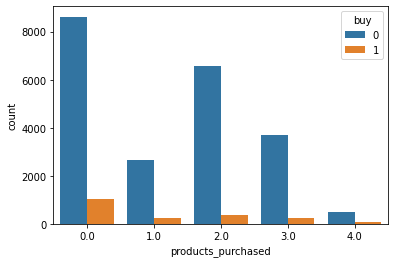

In [29]:
sns.countplot(x=df_train['products_purchased'],data = df_train,hue=df_train['buy']) 

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- Looks like its normaly distributed if we neglect the 0 values which field by null values

doing for __campaign_var_1__ and __campaign_var_2__ now

<AxesSubplot:xlabel='campaign_var_1', ylabel='count'>

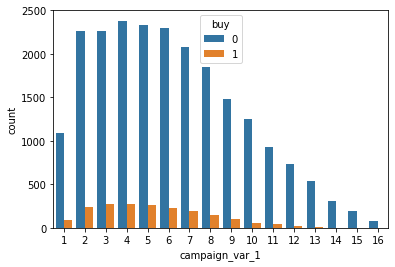

In [30]:
sns.countplot(x=df_train['campaign_var_1'],data = df_train,hue=df_train['buy']) 

<AxesSubplot:xlabel='campaign_var_2', ylabel='count'>

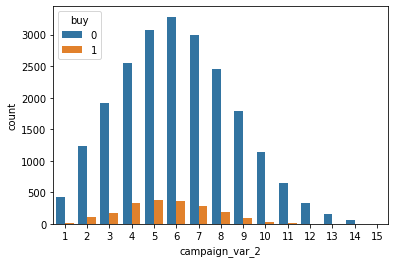

In [31]:
sns.countplot(x=df_train['campaign_var_2'],data = df_train,hue=df_train['buy']) 

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- campaign_var_1 is not normally distributed and skewed toward right direction and maximumn values lie between 2 to 10 
- campaign_var_2 almost normally distributed and maximum values lie between 3 to 10

Let's check the user_activity_var (1 to 12)

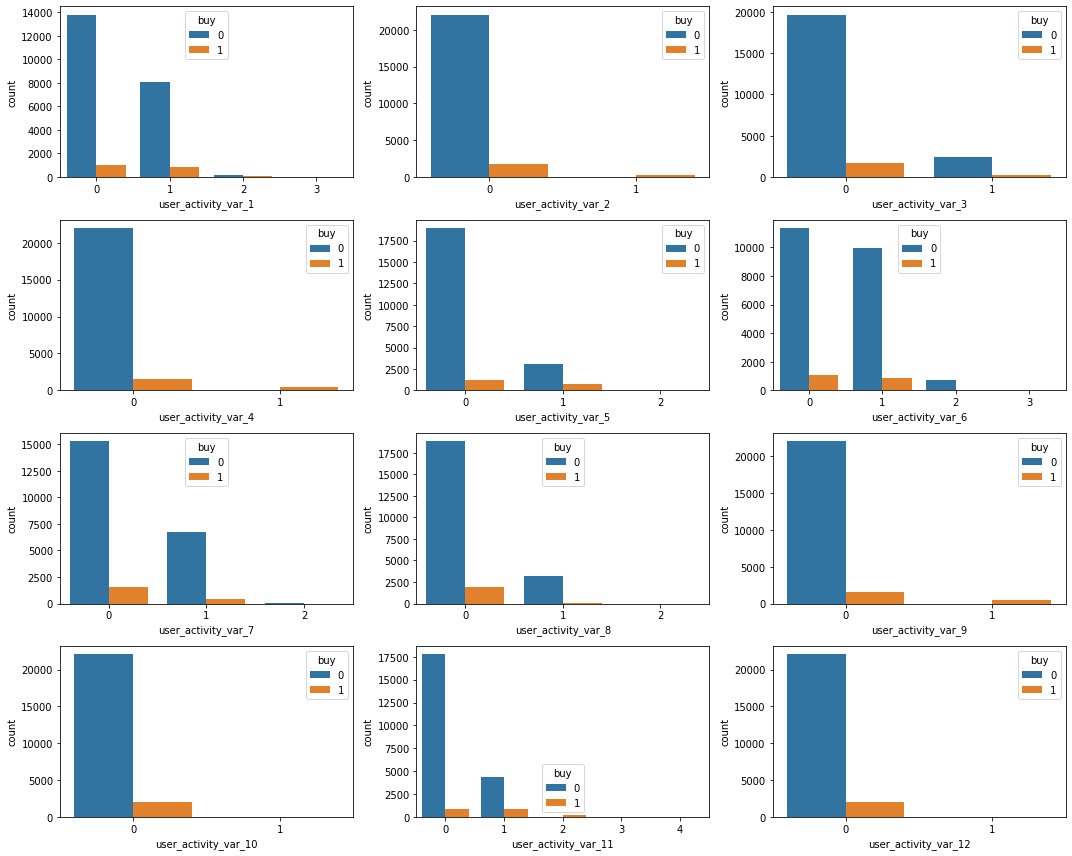

In [32]:
user_activity=[]
for i in range(1,13):
    user_activity.append('user_activity_var_'+str(i))

n=3
plt.figure(figsize=[15,3*math.ceil(len(user_activity)/n)])

for i in range(len(user_activity)):
    plt.subplot(math.ceil(len(user_activity)/n),n,i+1)
    sns.countplot(x=df_train[user_activity[i]],data = df_train,hue=df_train['buy']) 
plt.tight_layout()
plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

* Observation shows that some user activity has no value like 
- user_activity_var_10 has no values in 1
- user_activity_var_11 has no values in 3 and 4
- user_activity_var_12 has no values in 1
- user_activity_var_5 and 6 has no values in 2 and 3

### 6. Statistical Significance test

#### Chi square test

In [33]:
# Lets see is there any impact the user_activity feature do on target variabel
from scipy.stats import chi2_contingency

In [34]:
# significance value
alpha = 0.05

significant_variables = []
user_activity.append('campaign_var_1')
user_activity.append('campaign_var_2')

for col in user_activity:  
    # Create a crosstab table
    temp = pd.crosstab(df_train[col],df_train['buy'])
    
    # Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
    stat, p, dof, expected = chi2_contingency(temp)
    
    # Determine whether to reject or keep your null hypothesis
    print(col.ljust(20), ',  chisquared=%.5f,   p-value=%.5f' % (stat, p))
    if p <= alpha:
        significant_variables.append(col)
    else:
        ""

user_activity_var_1  ,  chisquared=134.61038,   p-value=0.00000
user_activity_var_2  ,  chisquared=2894.21084,   p-value=0.00000
user_activity_var_3  ,  chisquared=0.13953,   p-value=0.70875
user_activity_var_4  ,  chisquared=3812.47823,   p-value=0.00000
user_activity_var_5  ,  chisquared=1057.02914,   p-value=0.00000
user_activity_var_6  ,  chisquared=12.19296,   p-value=0.00675
user_activity_var_7  ,  chisquared=53.42918,   p-value=0.00000
user_activity_var_8  ,  chisquared=267.93349,   p-value=0.00000
user_activity_var_9  ,  chisquared=5037.13610,   p-value=0.00000
user_activity_var_10 ,  chisquared=155.95821,   p-value=0.00000
user_activity_var_11 ,  chisquared=3644.27487,   p-value=0.00000
user_activity_var_12 ,  chisquared=134.23903,   p-value=0.00000
campaign_var_1       ,  chisquared=204.71129,   p-value=0.00000
campaign_var_2       ,  chisquared=247.32125,   p-value=0.00000


chi-square test shows that user_activity_var_3 and user_activity_var_6 is above the significance level and we can drop this

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> EDA Summary:</h4>
</div>

- Train data set contains 39161 rows and 19 variables i.e feature
- Test data set contain 13184 rows and 18 columns i.e feature
- means train data has 18 feature and one target, here "buy" has the target variable
- Number of Numerical Variable : 16
- Missing values :products_purchased  (53.39%), signup_date (38.59%)

**Checking Relationship between missing data on products_purchased and buy found some interesting insight**

- 5% has the potential customer who bought the product
- 95% customer do not bought the product

- Replacing 5% null values with 1 and 95% null values with 0

**Target**
- Target class is imbalanced. will do the necessary action if need

## 7. Data Preprocessing for Model Building


The goal of this section is to:
- Clean up columns
- Create X and y
- Split the dataset in training and test sets

Droping the columns which may not be useful for model building

In [35]:
# droping column on the basis of above observation
drop_col = ['id','created_at','signup_date','month_sign','weekdays_sign','user_activity_var_3', 'user_activity_var_6', 
            'days_sign', 'month_create', 'weekdays_create',
             'days_create']

drop_col_sub = ['id','created_at','signup_date','user_activity_var_3','user_activity_var_6']

df_train.drop(drop_col,axis=1, inplace=True)

In [36]:
#droping same with submission file
X_sub = test_sub.copy() #keeping submissing file safe 
X_sub.drop(drop_col_sub,axis=1, inplace=True)

In [37]:
# Split the y variable series and x variables dataset
X = df_train.drop(['buy'],axis=1)
y = df_train['buy']

In [38]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [39]:
# Head of X_train
X_train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
29901,3,5,2.0,0,0,0,0,0,0,0,0,1,0
34902,8,9,3.0,0,0,0,0,0,0,0,0,0,0
9136,8,5,0.0,2,0,0,0,0,0,0,0,0,0
30670,7,8,3.0,0,0,0,0,0,0,0,0,0,0
3555,7,5,0.0,0,0,0,0,1,0,0,0,1,0


## 8. Model Building

Finally, model building starts here.

The goal of this section is to:
- Build ML models
- Evaluate the performance

__Classification Summary Function__

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

Evaluation_Results = pd.DataFrame(columns=['Model','Accuracy', 'Precision','Recall','F1_score','F1-Sub'])

def Classification_Summary(Evaluation_Results,model_name,pred,target,i,f1_sub):
    Accuracy =round(accuracy_score(target, pred),3)*100   
    Precision=round(precision_score(target, pred, average='weighted'),3)*100 
    Recall =round(recall_score(target, pred, average='weighted'),3)*100 
    F1_score =round(f1_score(target, pred, average='weighted'),3)*100 
    
    Evaluation_Results.loc[i]=[model_name,Accuracy,Precision,Recall,F1_score,f1_sub] 

## 9. Start building the ML models

Let's start with XGBoost first 

### Checking simple model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [42]:
#traing simple model
models = [
    RandomForestClassifier(max_depth=5, random_state=0, n_estimators=100, n_jobs=-1),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(max_depth=5),
    GradientBoostingClassifier(),
    GaussianNB(),
    SVC(),
    XGBClassifier(eval_metric='mlogloss'),
    KNeighborsClassifier()
]

In [43]:
#cross validation
CV=5
cv_df = pd.DataFrame(index=range(CV*len(models)))

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}

In [44]:
entries=[]
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_validate(model,X,y, scoring=scoring,cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        prec_macro = accuracies['test_prec_macro'].mean()
        rec_macro = accuracies['test_rec_macro'].mean()
        f1_macro = 2*(prec_macro*rec_macro)/(prec_macro+rec_macro)
        entries.append((model_name,fold_idx,prec_macro,rec_macro,f1_macro))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','prec_macro','rec_macro','f1_macro']) 

In [45]:
mean_macro = cv_df.groupby('model_name')['prec_macro','rec_macro','f1_macro'].mean()

In [46]:
mean_macro

,prec_macro,rec_macro,f1_macro
model_name,,,
DecisionTreeClassifier,0.961320,0.763663,0.851167
GaussianNB,0.952412,0.731036,0.827168
GradientBoostingClassifier,0.947926,0.776996,0.853992
KNeighborsClassifier,0.864083,0.575556,0.690907
LogisticRegression,0.950076,0.760308,0.844664
RandomForestClassifier,0.962150,0.762948,0.851048
SVC,0.953982,0.725826,0.824409
XGBClassifier,0.936633,0.777559,0.849715


#### Graphical view of Performance of model

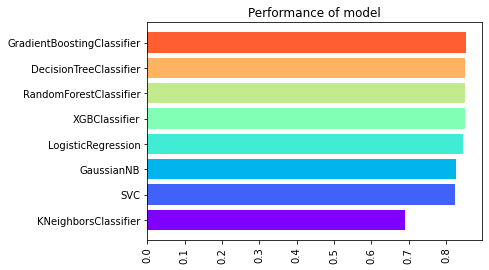

In [47]:
f1sub = mean_macro.sort_values('f1_macro')
color = plt.cm.rainbow(np.linspace(0, 1, 9))
plt.barh(f1sub.index, f1sub['f1_macro'], color=color)
plt.xticks(rotation=90)
plt.title('Performance of model')
plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> EDA Inferences:</h4></div>

- By seeing above model performance GradientBoostingClassifier, DecisionTreeClassifier and XGBClassifier perform very well with respect to class1

- Let's do experiment on this model


Lets build the function to fit the model

In [48]:
def modelfit(model, x_data,feature,y_target,x_test,y_test_,performCV=True, printFeatureImportance=True, cv_folds=5):
    
    #Fit the modelorithm on the data
    model.fit(x_data[feature], y_target)
        
    #Predict training set:
    x_data_predictions = model.predict(x_data[feature])
    x_data_predprob = model.predict_proba(x_data[feature])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(model, x_data[feature], y_target, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report - Training")
    print ("Accuracy : %.4g" % accuracy_score(y_target.values, x_data_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(y_target, x_data_predprob))
    
    #Predict test set:
    test_predictions = model.predict(x_test[feature])
    test_predprob = model.predict_proba(x_test[feature])[:,1]
    
    #Print model report:
    print ("\nModel Report Test set")
    print ("Accuracy : %.4g" % accuracy_score(y_test_.values, test_predictions))
    print ("AUC Score (Test Set): %f" % roc_auc_score(y_test_,   test_predprob))
    
    #print classification report
    print("\nClassification Report : \n",classification_report(y_test_, test_predictions))
    
    if performCV:
        print( "\nCV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
 
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, feature).sort_values(ascending=False)
        feat_imp.plot(kind='barh', title='Feature Importances')
        plt.xlabel('Feature Importance Score')

In [49]:
col = [var for var in X_train.columns]

### Model 1. Gradient Boosting Classifier

In [50]:
#Building model with hyperparameter tunning


Model Report - Training
Accuracy : 0.9601
AUC Score (Train): 0.919069

Model Report Test set
Accuracy : 0.9586
AUC Score (Test Set): 0.913467

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      6623
           1       0.96      0.52      0.67       592

    accuracy                           0.96      7215
   macro avg       0.96      0.76      0.83      7215
weighted avg       0.96      0.96      0.95      7215


CV Score : Mean - 0.9114842 | Std - 0.01077231 | Min - 0.8970891 | Max - 0.9260934


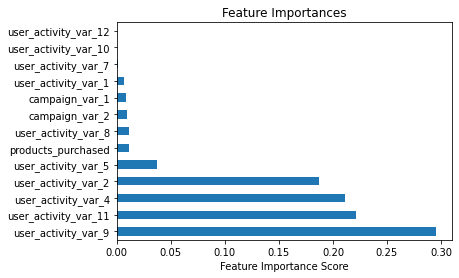

In [51]:
param = {'min_samples_split':range(1000,2100,200), 
         'min_samples_leaf':range(30,60,10),
         'learning_rate':[0.01,0.05]}

gsearch = GridSearchCV(estimator = 
                       GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                  max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param, scoring='roc_auc',n_jobs=4, cv=5)

#fit model for best estimator
gsearch.fit(X_train,y_train)

#predit the model
modelfit(gsearch.best_estimator_,X_train,col,y_train,X_test,y_test)

In [52]:
# Let's predit in the submissin file
sub_pred_gbc = gsearch.best_estimator_.predict(X_sub)

#maping predicted column to submission file
test_sub['pred_gbc'] = sub_pred_gbc

#genrating csv file to upload
test_sub[['id','pred_gbc']].to_csv('Submission_gbc.csv', index=False,header=['id','buy'])

In [53]:
# F1 score after submission- 0.73652694

### Model 2. XGBoost Classifier


Model Report - Training
Accuracy : 0.9614
AUC Score (Train): 0.935418

Model Report Test set
Accuracy : 0.9591
AUC Score (Test Set): 0.909084

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      6623
           1       0.92      0.55      0.69       592

    accuracy                           0.96      7215
   macro avg       0.94      0.77      0.83      7215
weighted avg       0.96      0.96      0.95      7215


CV Score : Mean - 0.912952 | Std - 0.009258631 | Min - 0.9029593 | Max - 0.9248951


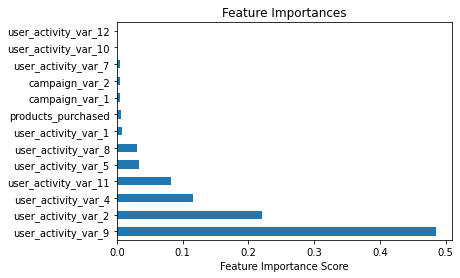

In [54]:
parameter = {'max_depth':[4,5,6],
            'min_child_weight':[4,5,6]
            }

xgb_grid = GridSearchCV(estimator = XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             cv=2
                            )

xgb_grid.fit(X_train, y_train)

# fit and predit the model
modelfit(xgb_grid.best_estimator_,X_train,col,y_train,X_test,y_test)

In [55]:
# Let's predit in the submissin file
sub_pred_xgb = xgb_grid.predict(X_sub)

#maping predicted column to submission file
test_sub['pred_xgb'] = sub_pred_xgb

#genrating csv file to upload
test_sub[['id','pred_xgb']].to_csv('Submission_xgb.csv', index=False,header=['id','buy'])

In [56]:
# F1 score after submission 0.7343283

### Model 3. DecisionTreeClassifier


Model Report - Training
Accuracy : 0.9601
AUC Score (Train): 0.852572

Model Report Test set
Accuracy : 0.9594
AUC Score (Test Set): 0.840071

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      6623
           1       0.96      0.53      0.68       592

    accuracy                           0.96      7215
   macro avg       0.96      0.76      0.83      7215
weighted avg       0.96      0.96      0.95      7215


CV Score : Mean - 0.8523485 | Std - 0.01508446 | Min - 0.8341938 | Max - 0.8747203
Wall time: 222 ms


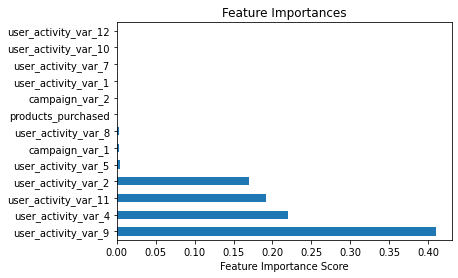

In [57]:
%%time
# Define the model
dt_clf = DecisionTreeClassifier(random_state=24,max_depth=5)

# Train the model
modelfit(dt_clf,X_train,col,y_train,X_test,y_test)

In [58]:
# Let's predit in the submissin file
sub_pred_dt = dt_clf.predict(X_sub)

#maping predicted column to submission file
test_sub['pred_dt'] = sub_pred_dt

#genrating csv file to upload
test_sub[['id','pred_dt']].to_csv('Submission_dt.csv', index=False,header=['id','buy'])

In [59]:
# F1 score after submission 0.72140762

## 10. Handling Class Imbalance

#### Model with down sample

In [60]:
#Let't try the data set with with down samping the larger class
no_buy_index = df_train[df_train['buy'] == 0].index  
no_buy = len(df_train[df_train['buy'] == 0])            
print(no_buy)

buy_index = df_train[df_train['buy'] == 1].index   
buy = len(df_train[df_train['buy'] == 1])            
print(buy)

22075
1973


In [61]:
random_indices = np.random.choice(no_buy_index, no_buy - 12000 , replace=False)    #Randomly pick up no_buy
down_sample_indices = np.concatenate([buy_index,random_indices])  # combine
down_sample = df_train.loc[down_sample_indices]  # Extract all those records to create new dataset
down_sample.shape
down_sample.groupby(["buy"]).count()  # look at the class distribution after downsample

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
buy,,,,,,,,,,,,,
0,10075,10075,10075,10075,10075,10075,10075,10075,10075,10075,10075,10075,10075
1,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973


Looks like class is balanced now

In [62]:
# Split the y variable series and x variables dataset
X_bal = df_train.drop(['buy'],axis=1)
y_bal = df_train['buy']

### Model 4:  Gradient Boosting Classifier On Down Sample Mejority Class


Model Report - Training
Accuracy : 0.9598
AUC Score (Train): 0.917478

Model Report Test set
Accuracy : 0.9598
AUC Score (Test Set): 0.917478

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     22075
           1       0.97      0.53      0.68      1973

    accuracy                           0.96     24048
   macro avg       0.96      0.76      0.83     24048
weighted avg       0.96      0.96      0.95     24048


CV Score : Mean - 0.9099826 | Std - 0.01797516 | Min - 0.8783749 | Max - 0.9313729


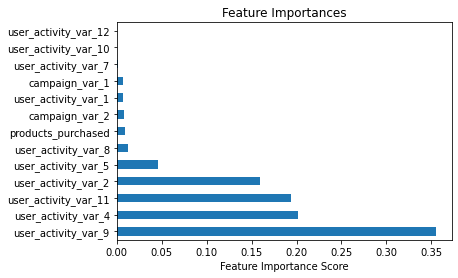

In [63]:
param = {'min_samples_split':range(1000,2100,200), 
         'min_samples_leaf':range(30,60,10),
         'learning_rate':[0.01,0.05]}

gsearch_ds = GridSearchCV(estimator = 
                       GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                  max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param, scoring='roc_auc',n_jobs=4, cv=5)

#fit model for best estimator
gsearch_ds.fit(X_bal,y_bal)

#predit the model
modelfit(gsearch_ds.best_estimator_,X_bal,col,y_bal,X_bal,y_bal)

In [64]:
# Let's predit in the submissin file
sub_pred_gbc_ds = gsearch_ds.best_estimator_.predict(X_sub)

#maping predicted column to submission file
test_sub['pred_gbc_ds'] = sub_pred_gbc_ds

#genrating csv file to upload
test_sub[['id','pred_gbc_ds']].to_csv('Submission_gbc_ds.csv', index=False,header=['id','buy'])

In [65]:
#0.7305389

### Model 5: XGradient Boosting Classifier On Down Sample Mejority Class


Model Report - Training
Accuracy : 0.961
AUC Score (Train): 0.930406

Model Report Test set
Accuracy : 0.961
AUC Score (Test Set): 0.930406

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     22075
           1       0.93      0.57      0.71      1973

    accuracy                           0.96     24048
   macro avg       0.95      0.78      0.84     24048
weighted avg       0.96      0.96      0.96     24048


CV Score : Mean - 0.9096634 | Std - 0.01662502 | Min - 0.8821495 | Max - 0.9314816


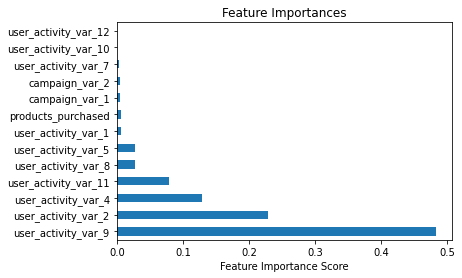

In [66]:
parameter = {'max_depth':[4,5,6],
            'min_child_weight':[4,5,6]
            }

xgb_grid_ds = GridSearchCV(estimator = XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             cv=2
                            )

xgb_grid_ds.fit(X_bal, y_bal)

# fit and predit the model
modelfit(xgb_grid_ds.best_estimator_,X_bal,col,y_bal,X_bal,y_bal)

In [67]:
# Let's predit in the submissin file
sub_pred_xgb_ds = xgb_grid_ds.predict(X_sub)

#maping predicted column to submission file
test_sub['pred_xgb_ds'] = sub_pred_xgb_ds

#genrating csv file to upload
test_sub[['id','pred_xgb_ds']].to_csv('Submission_xgb_ds.csv', index=False,header=['id','buy'])

## 11. Feature Importance & SHAP Values

From the above model and by seeing feature importance matrix we found that some feature has no role for prediction

* Lets do some experiment in feature selection

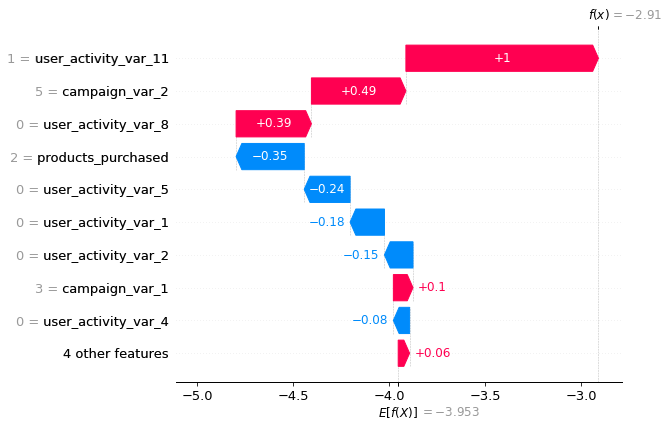

In [68]:
# compute SHAP values
import shap
explainer = shap.Explainer(xgb_grid.best_estimator_, X_train) # , link=shap.links.logit)
shap_values_waterfall = explainer(X_train[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values_waterfall[0])

## 12. PCA for Dimensionality Reduction

Before doing this Standardize the Data

In [69]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scales = std_scale.transform(X_test)
X_sub_scaled = std_scale.transform(X_sub)

In [70]:
X_train_scaled.shape

(16833, 13)

In [71]:
#Apply PCA on the data with max components

from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(X_train_scaled)

PCA(n_components=13)

In [72]:
print(pca.explained_variance_)

[1.65352902 1.46363761 1.09497463 1.04318248 1.01607468 0.99343616
 0.9830932  0.94790611 0.92669995 0.87019512 0.80854458 0.76328621
 0.43621259]


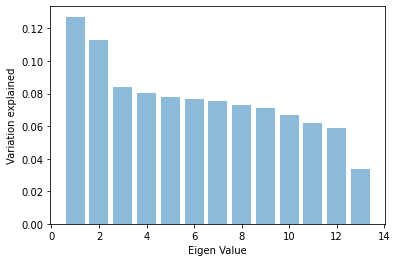

In [73]:
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

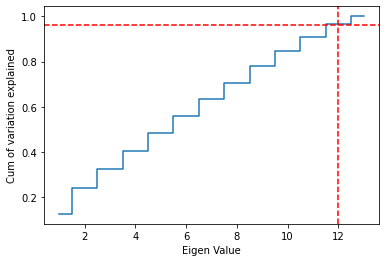

In [74]:
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.axhline(y=0.96,color='red',linestyle="--")
plt.axvline(x=12,color='red',linestyle="--")
plt.show()

PCA with 12 component is covering more than 96% information

In [75]:
pca12 = PCA(n_components=12)
pca12.fit(X_train_scaled)

PCA(n_components=12)

In [76]:
#transfor the train, test and submission data set to new dimension
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_sub_pca = pca.transform(X_sub)

In [77]:
#Selecting XGB classifier to rebuild the model with new dimension
parameter = {'max_depth':[4,5,6],
            'min_child_weight':[4,5,6]
            }

xgb_grid_pca = GridSearchCV(estimator = XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             cv=2
                            )

xgb_pca = xgb_grid_pca.fit(X_train_pca, y_train).best_estimator_

# fit and predit the model
pred_pca = xgb_pca.predict(X_test_pca)



In [78]:
predprob_pca = xgb_pca.predict_proba(X_test_pca)[:,1]

#Print model report:
print ("\nModel Report Test set")
print ("Accuracy : %.4g" % accuracy_score(y_test.values, pred_pca))
print ("AUC Score (Test Set): %f" % roc_auc_score(y_test,   predprob_pca))

#print classification report
print("\nClassification Report : \n",classification_report(y_test, pred_pca))


Model Report Test set
Accuracy : 0.9548
AUC Score (Test Set): 0.890845

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      6623
           1       0.87      0.53      0.66       592

    accuracy                           0.95      7215
   macro avg       0.91      0.76      0.82      7215
weighted avg       0.95      0.95      0.95      7215



In [79]:
# Let's predit in the submissin file
sub_pred_xgb_pca = xgb_pca.predict(X_sub_pca)

#maping predicted column to submission file
test_sub['pred_xgb_pca'] = sub_pred_xgb_pca

#genrating csv file to upload
test_sub[['id','pred_xgb_pca']].to_csv('Submission_xgb_pca.csv', index=False,header=['id','buy'])

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Summary:</h4></div>

After doing all the experiment and submission of file below results get
